In [2]:
%run ./Avocado_EDA.ipynb

C:\Users\heatb\AppData\Local\Temp\ipykernel_9464\1500790782.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Coun

In [3]:
#Quitamos los valores NaN del dataframe
df = df.dropna()
#Mostramos la primera fila para ver las columnas y que datos estaremos tratando

In [4]:
print(df.head(1))

   Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
0           0  2015-12-27          1.33      64236.62  1036.74  54454.85   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25          0.0  conventional  2015   

   region region_type  
0  Albany        City  


In [5]:
#Revision de valores nulos
nulos = df.isnull().sum()

In [6]:
print(nulos)
#No hay nulos así que seguimos

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
region_type     0
dtype: int64


Los datos vienen con todas las regiones y subregiones mezcladas, junto con TotalUS que es una dato de todos los otros sumados, por ello hay que separarlos

Vamos a subdividir las regiones en los bloques que provienen:

- Northeast: Providence, Boston, Albany, Buffalo/Rochester, Syracuse, Northen New England, Hartford/Springfield, Harrisburg/Scranton, New York, Pittsburgh, Philadelphia

- Midsouth: Louisville, Richmond/Norfolk, Charlotte, Raleigh/Greensboro, Roanoke, Baltimore/Washington, Nashville

- Southeast: Miami/FT.Lauderdale, Orlando, Jacksonville, South Carolina, Tampa, Atlanta, Birmingham/Montgomery

- Great Lakes: Cincinnati/Dayton, Grand Rapids, Indianapolis, Columbus, Toledo, Detroit, Peoria/Springfield, Chicago

- Plains: St. Louis, Wichita

- South Central: Dallas/Ft. Worth, New Orleans/Mobile, Houston

- West: Spokane, Boise, Seattle, Portland, Denver, West Tex/New Mexico, Las Vegas, Phoenix/Tucson

- California: San Diego, San Francisco, Sacramento, Los Angeles

In [7]:
#Con Este codigo sabremos cada region y podremos agruparlas
unique_regions = df["region"].unique()
print(unique_regions)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


#### Gráfico de Violín

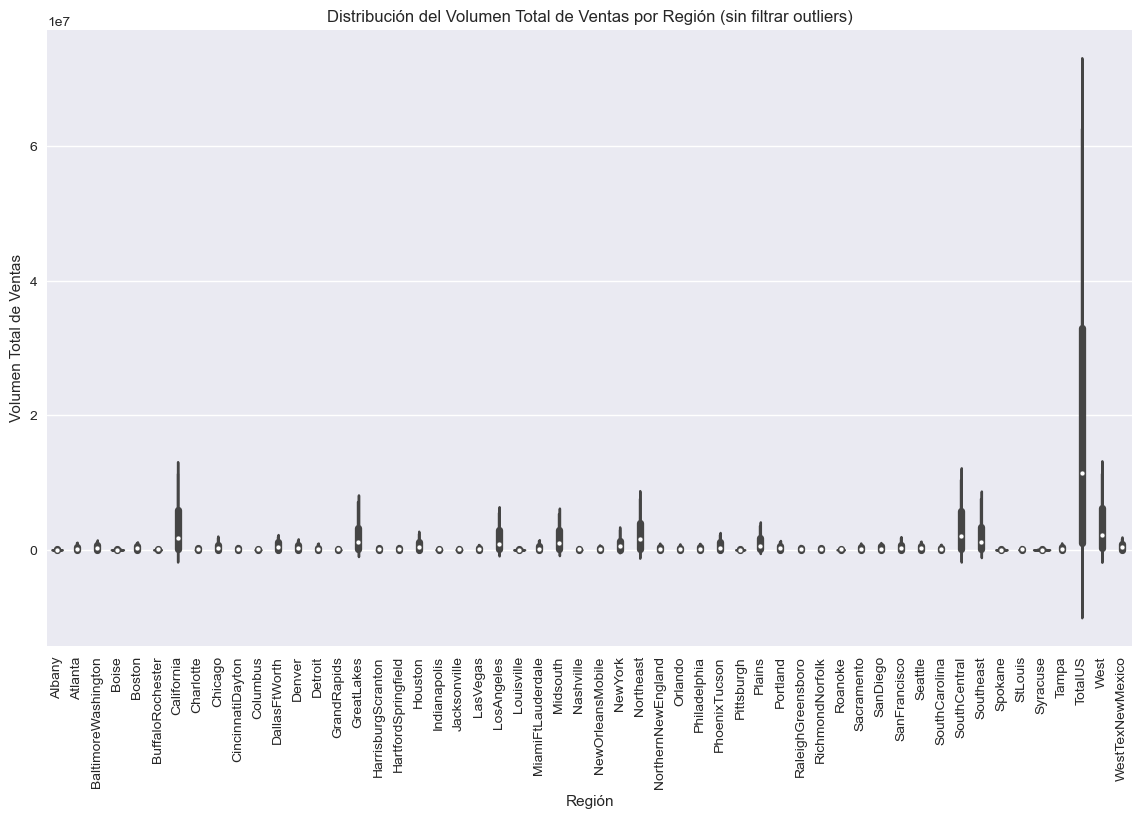

In [8]:
#Vamos a graficar un grafico de violin para poder ver que dsitribución siguen el total de ventas por regiones
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas por Región (sin filtrar outliers)")
plt.xlabel("Región")
plt.ylabel("Volumen Total de Ventas")
plt.show()

In [9]:
#Como podemos observar tenemos una gran disparidad de volumen total de ventas vamos a aplicar solo los datos 
#del quartil entre el 25% y el 75%
#Q1 = percentil 25 de "Total Volume"
#Q3 = percentil 75 de "Total Volume"
#IQR = Q3 - Q1
#Tambien a cada cuartil le aplicaremos un aumento del 50% puntos para tomar mas datos
Q1 = df["Total Volume"].quantile(0.25)
Q3 = df["Total Volume"].quantile(0.75)
IQR = Q3 - Q1

In [10]:
#Definimos al limite superior de nuestra toma de datos el quartil 3 mas un 50% del quartil 4 (último)
upper_threshold = Q3 + 1.5 * IQR
#Creamos un dataframe nuevo para graficar el violinplot a continuación con los quartiles limpios sin presenciaa de outliers
df_filtrado = df[df["Total Volume"]<= upper_threshold]

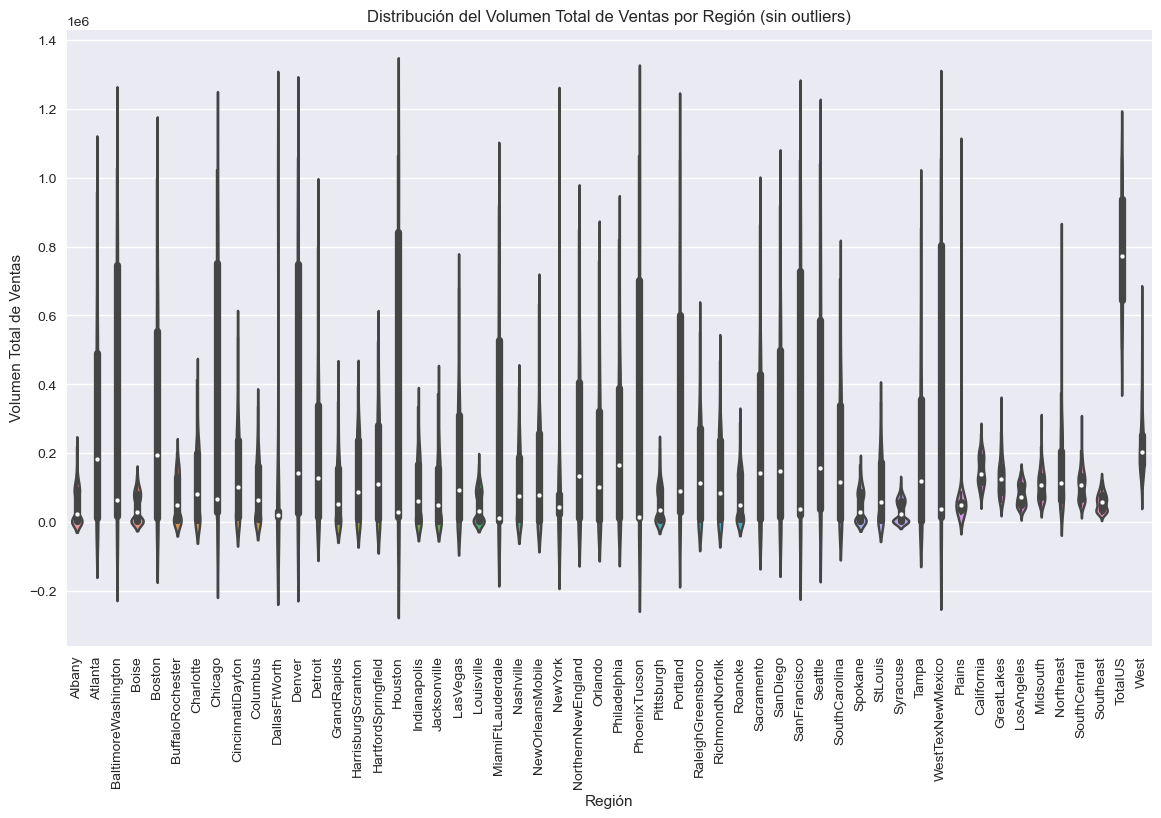

In [11]:
#Aqui graficamos el violín y observamos como las distribuciones cambian
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_filtrado, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas por Región (sin outliers)")
plt.xlabel("Región")
plt.ylabel("Volumen Total de Ventas")
plt.show()

Interpretacion de los resultados:
- Donde la distribución del violín es mas amplia, más densidad de datos hay en esa región. También si el violín es uniforme y conforma picos la distribución de los datos es consistente y no hay variaciones de outliers acentuados.
- Concluimos entonces que regiones como: Syracuse, Spokane, Louisville o Pittsburgh presentan una distribución de datos uniformes.

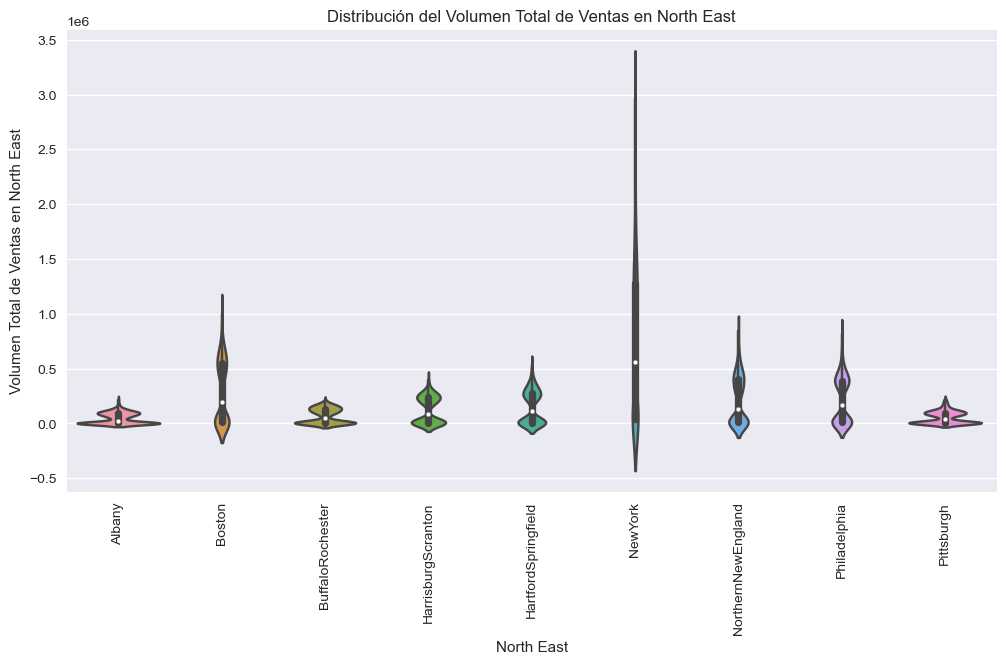

In [12]:
#Ahora realizamos el grafico de violin de cada subregion, para poder ver mejor los datos
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_northeast, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en North East")
plt.xlabel("North East")
plt.ylabel("Volumen Total de Ventas en North East")
plt.show()

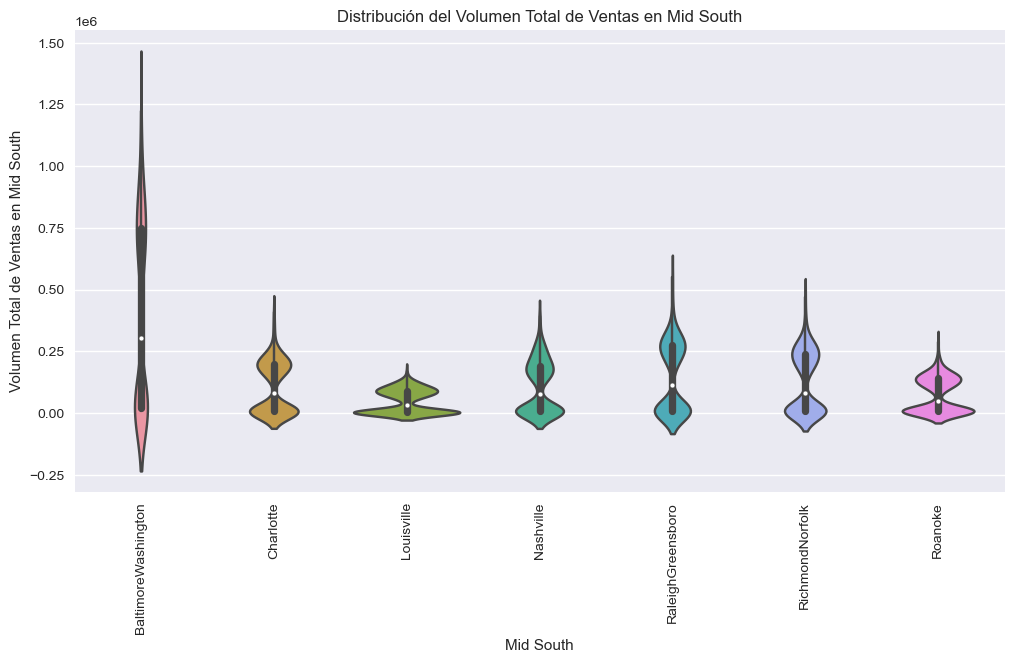

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_midsouth, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en Mid South")
plt.xlabel("Mid South")
plt.ylabel("Volumen Total de Ventas en Mid South")
plt.show()

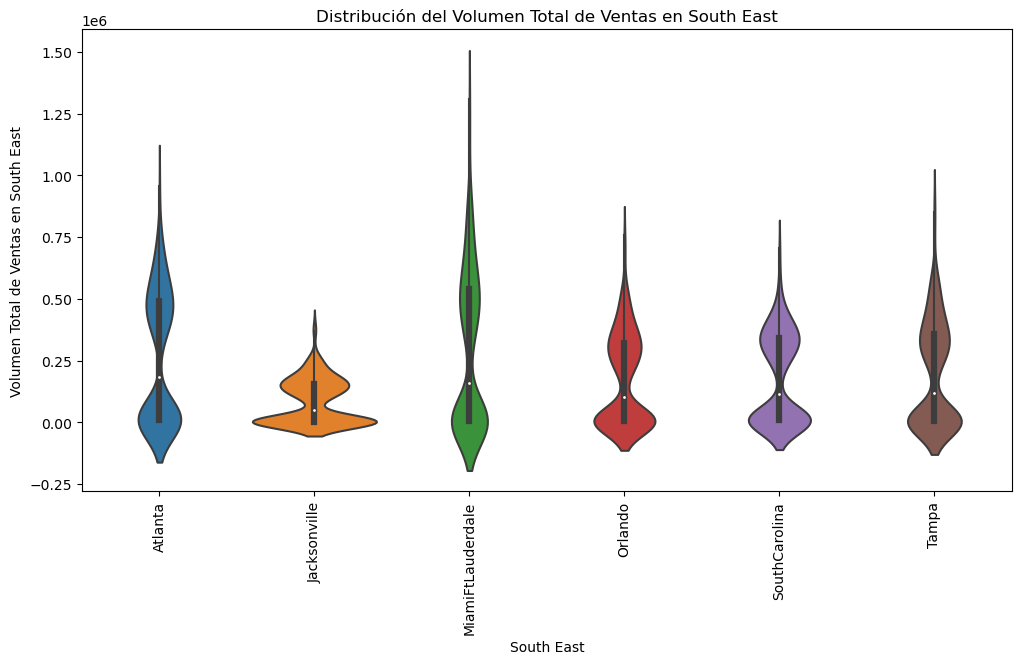

In [14]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_southeast, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en South East")
plt.xlabel("South East")
plt.ylabel("Volumen Total de Ventas en South East")
plt.show()

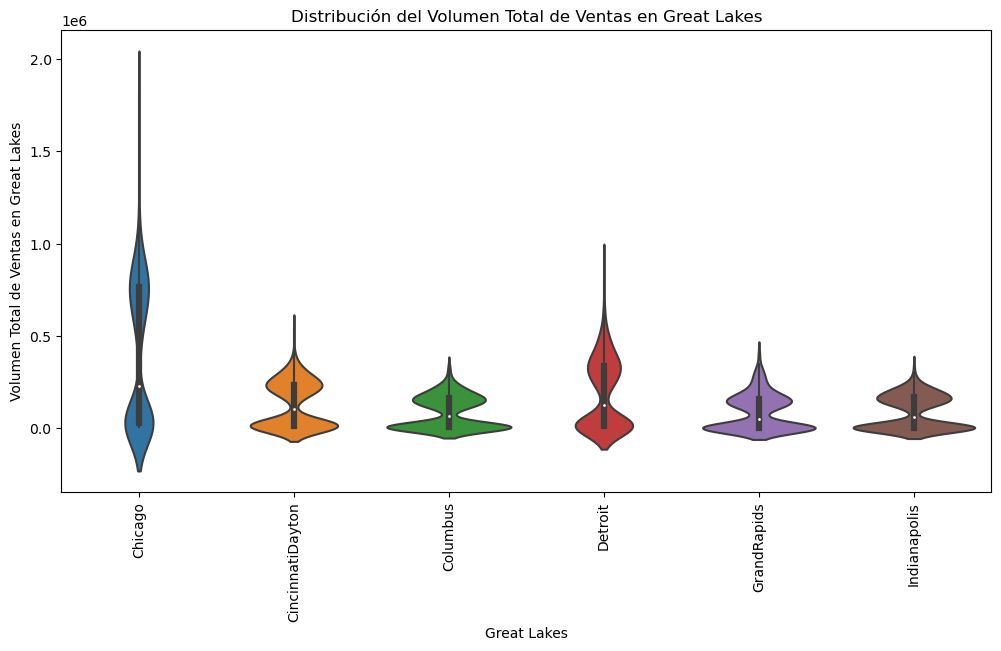

In [15]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_great_lakes, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en Great Lakes")
plt.xlabel("Great Lakes")
plt.ylabel("Volumen Total de Ventas en Great Lakes")
plt.show()

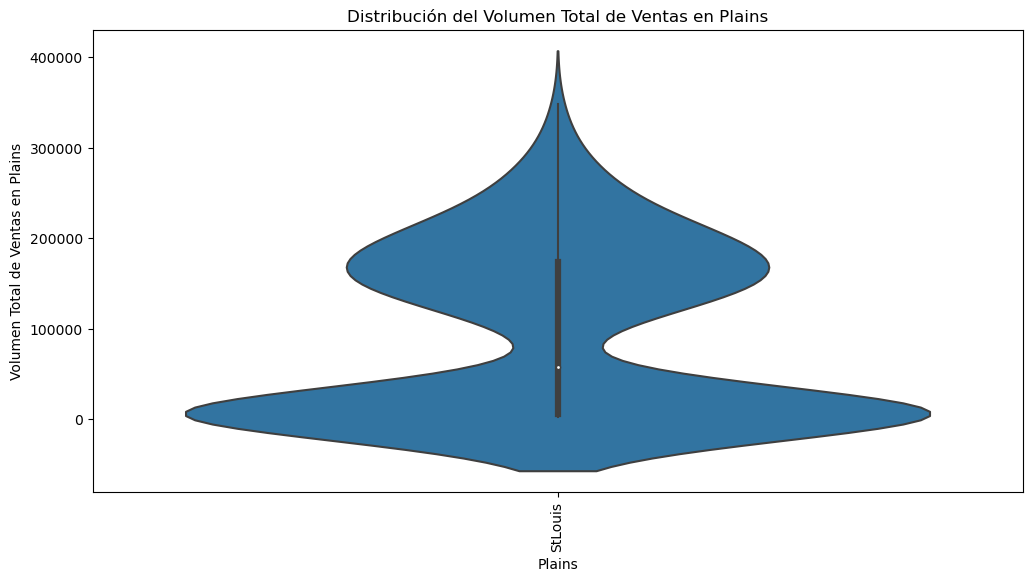

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_plains, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en Plains")
plt.xlabel("Plains")
plt.ylabel("Volumen Total de Ventas en Plains")
plt.show()

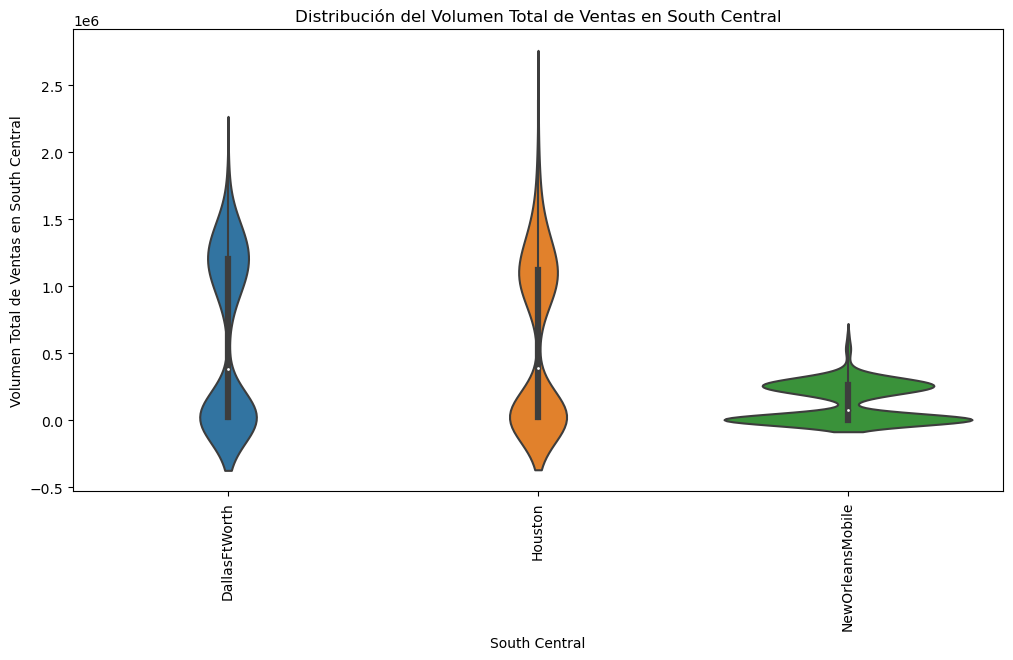

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_south_central, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en South Central")
plt.xlabel("South Central")
plt.ylabel("Volumen Total de Ventas en South Central")
plt.show()

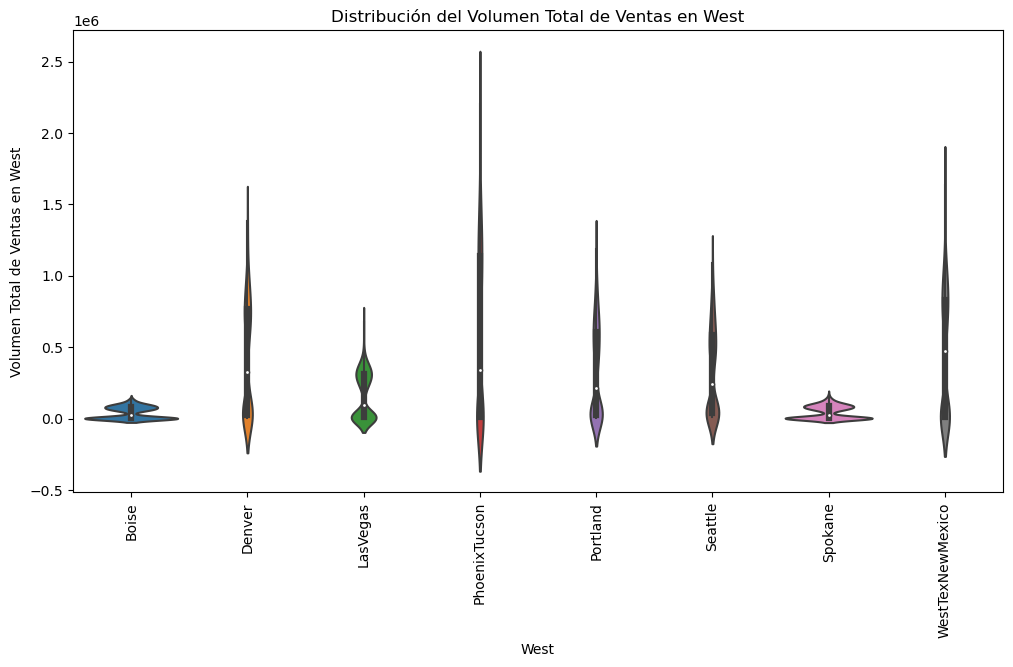

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_west, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en West")
plt.xlabel("West")
plt.ylabel("Volumen Total de Ventas en West")
plt.show()

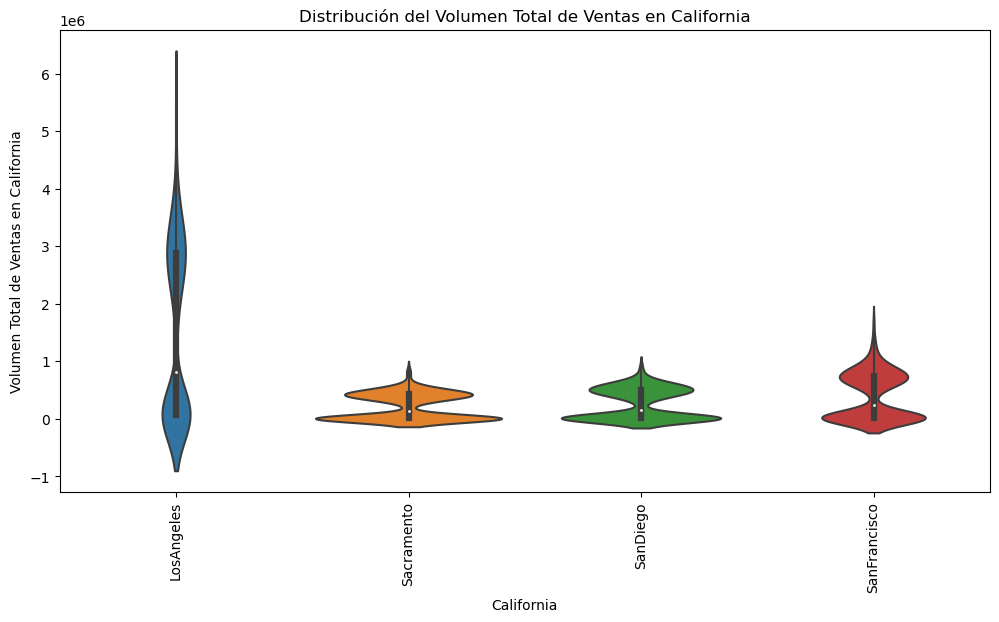

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_california, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en California")
plt.xlabel("California")
plt.ylabel("Volumen Total de Ventas en California")
plt.show()

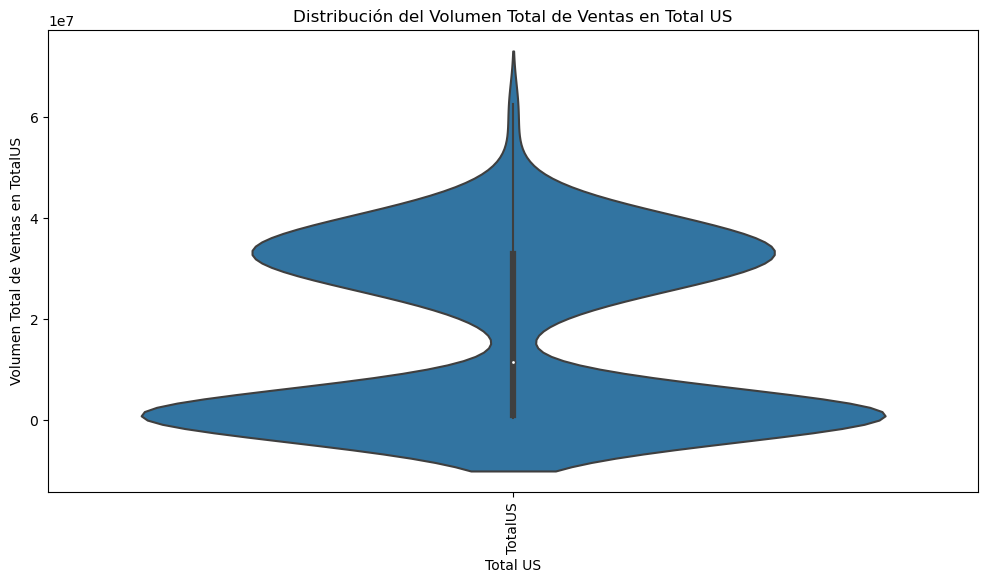

In [20]:
#Finalmente hacemos un violinplot de TotalUS para ver el comportamiento global en un solo "violin"
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_totalus, x="region", y="Total Volume")
plt.xticks(rotation=90)
plt.title("Distribución del Volumen Total de Ventas en Total US")
plt.xlabel("Total US")
plt.ylabel("Volumen Total de Ventas en TotalUS")
plt.show()

#### Boxplot comparativo entre precios y años

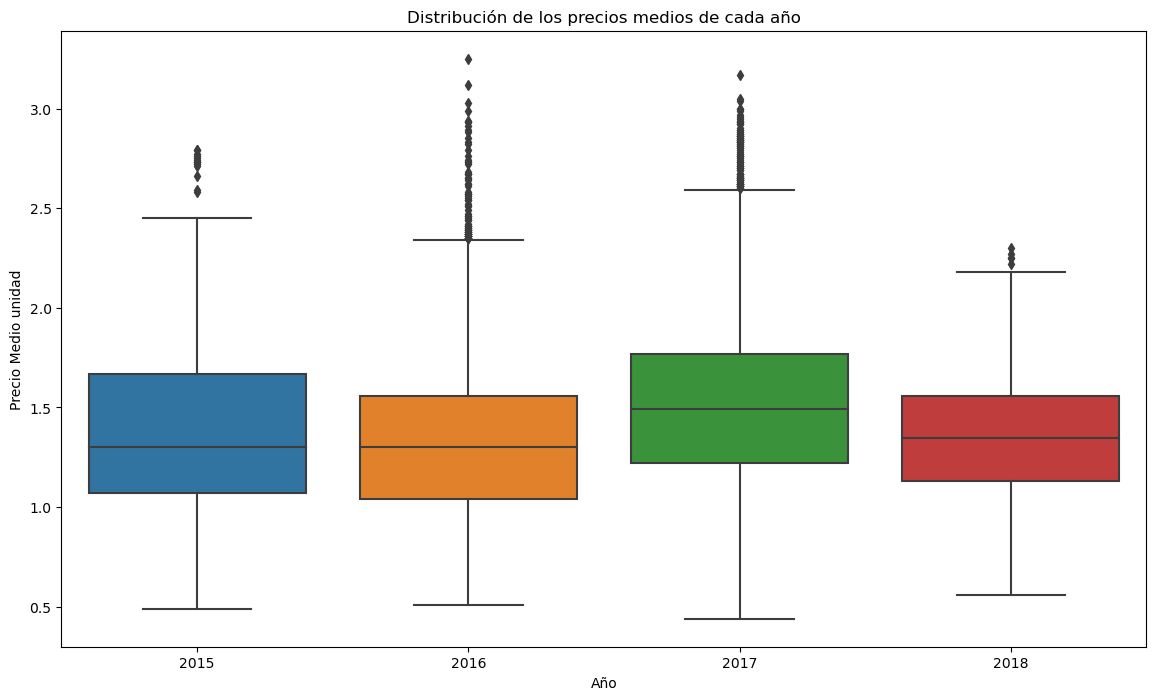

In [21]:
#Ahora utilizaremos un Boxplot para ver que tan distribuidos están los precios medios en cada año 
plt.figure(figsize=(14, 8))
sns.boxplot(data = df, x="year", y="AveragePrice")
plt.title("Distribución de los precios medios de cada año")
plt.xlabel("Año")
plt.ylabel("Precio Medio unidad")
plt.show()

Al observar una cantidad alarmante de outliers cuando usamos el dataframe original, utilizamos el dataframe de Total US para tener una idea general de los precios medios en EEUU y como están repartidas las observaciones en los distintos cuartiles

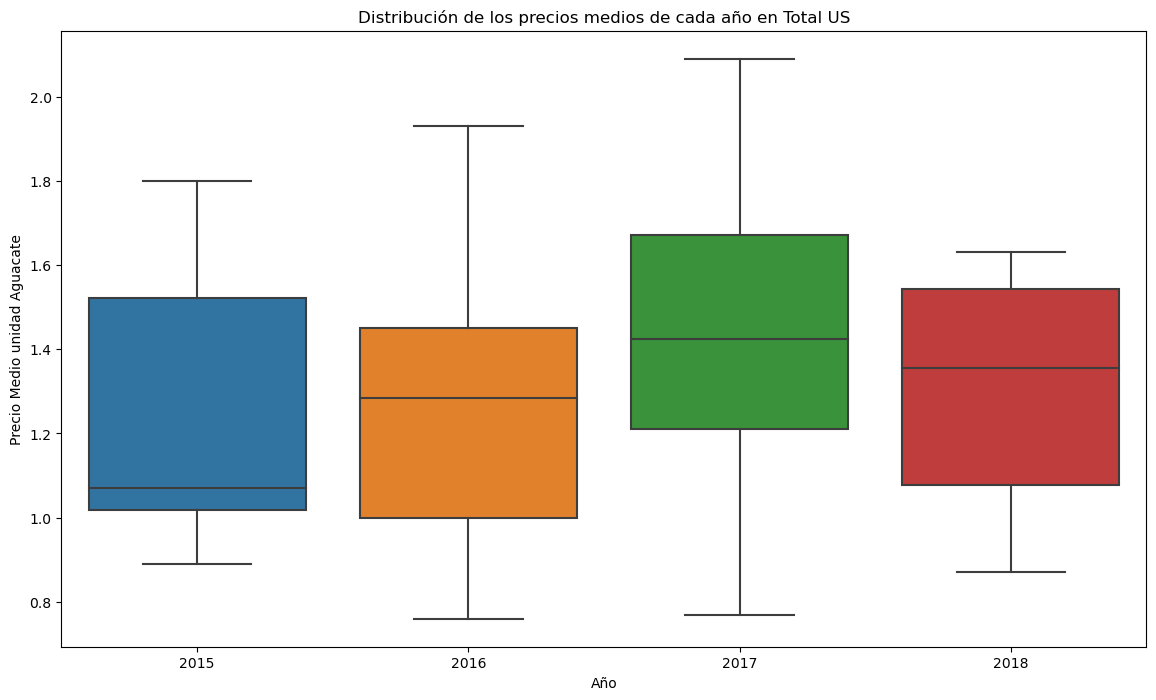

In [22]:
#Ahora utilizaremos un Boxplot para ver que tan distribuidos están los precios medios en cada año 
plt.figure(figsize=(14, 8))
sns.boxplot(data = df_totalus, x="year", y="AveragePrice")
plt.title("Distribución de los precios medios de cada año en Total US")
plt.xlabel("Año")
plt.ylabel("Precio Medio unidad Aguacate")
plt.show()

Interpretación de los resultados:
- La media del precio va incrementando de 2015 hasta 2017, para experimentar un pequeño retroceso en 2018

#### Histograma de Volumen total de ventas 

In [23]:
volumen_total = df["Total Volume"]
anyos = sorted(df["year"].unique())

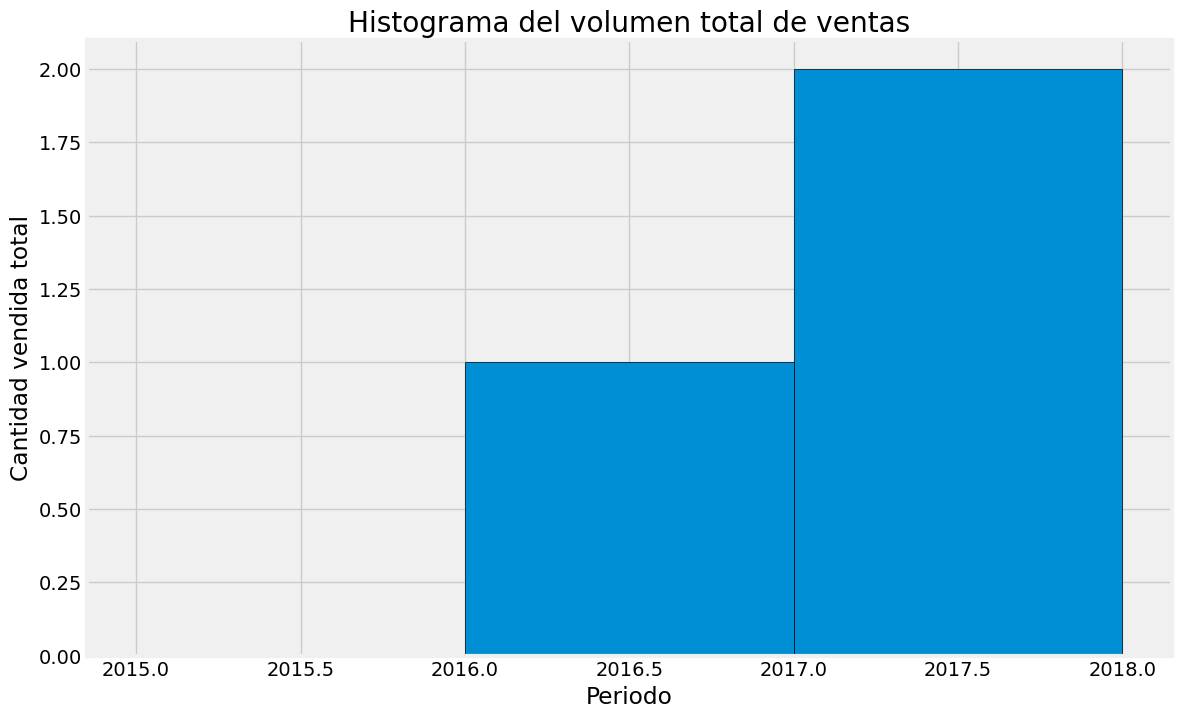

In [24]:
plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')
plt.hist(volumen_total, bins=anyos, edgecolor="black")
plt.title("Histograma del volumen total de ventas")
plt.xlabel("Periodo")
plt.ylabel("Cantidad vendida total")
plt.show()

In [25]:
#Al ver que este grafico es asimétrico, vamos a aplicar escala logarítmica para ver una representación mas fidedigna
log_data = np.log1p(df['Total Volume'])

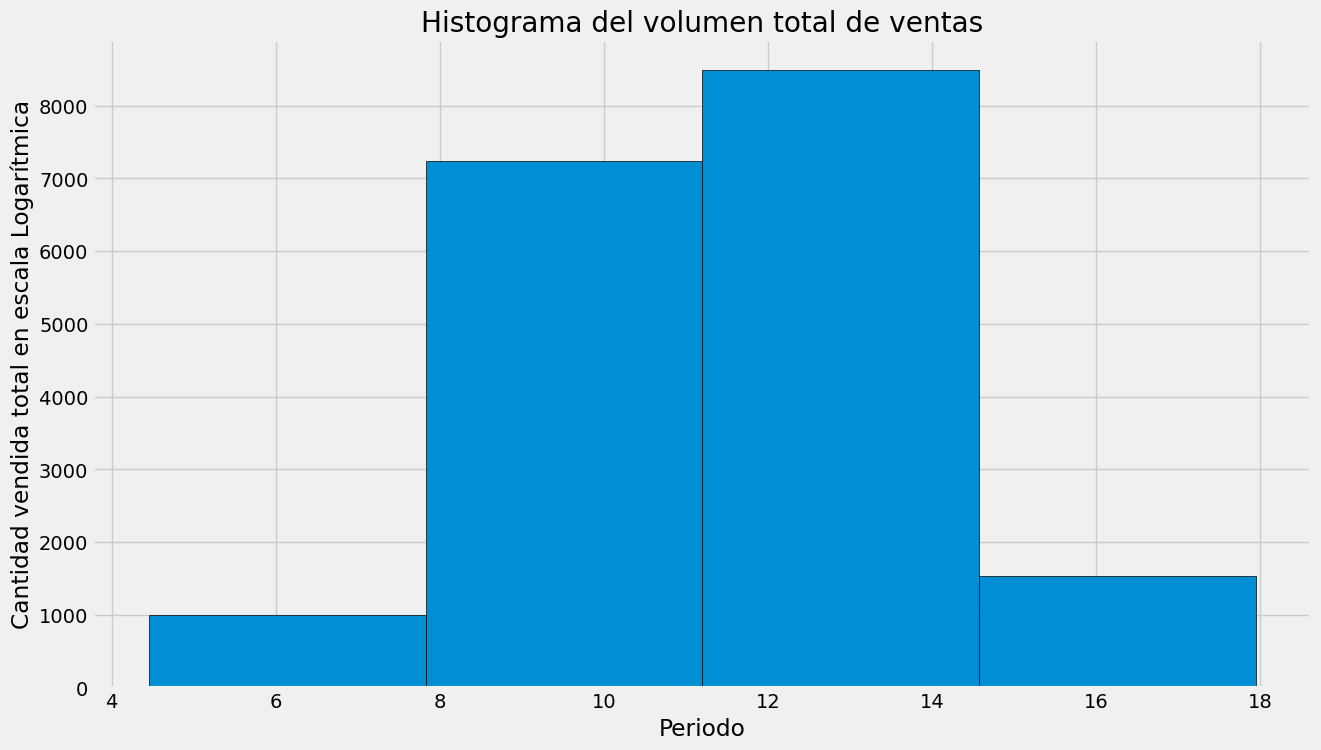

In [26]:
#Creamos de nuevo el histograma
plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')
plt.hist(log_data, bins=4, edgecolor="black")
plt.title("Histograma del volumen total de ventas")
plt.xlabel("Periodo")
plt.ylabel("Cantidad vendida total en escala Logarítmica")
plt.show()

Interpretación:
- Los valores comprimidos entre: ~4 y 8 == 2015
- Los valores comprimidos entre: 8 y ~11 == 2016
- Los valores comprimidos entre: ~11 y ~14.5 == 2017
- Los valores comprimidos entre: ~14.5 y ~18 == 2018

- En escala logarítmica se ve reflejado que la mayor cantidad vendida de aguacates se produjo entre el 2016 y el 2017 en todo el territorio nacional de EEUU.

#### Gráfico de Barras

In [27]:
#Primero sumamos los volúmenes de ventas por tipo de bolsa
total_bags = df["Total Bags"].sum()
small_bags = df["Small Bags"].sum()
large_bags = df["Large Bags"].sum()
xlarge_bags = df["XLarge Bags"].sum()

In [28]:
# Luego creamos los datos para el gráfico
bolsa_tipos = ["Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]
ventas_totales = [total_bags, small_bags, large_bags, xlarge_bags]

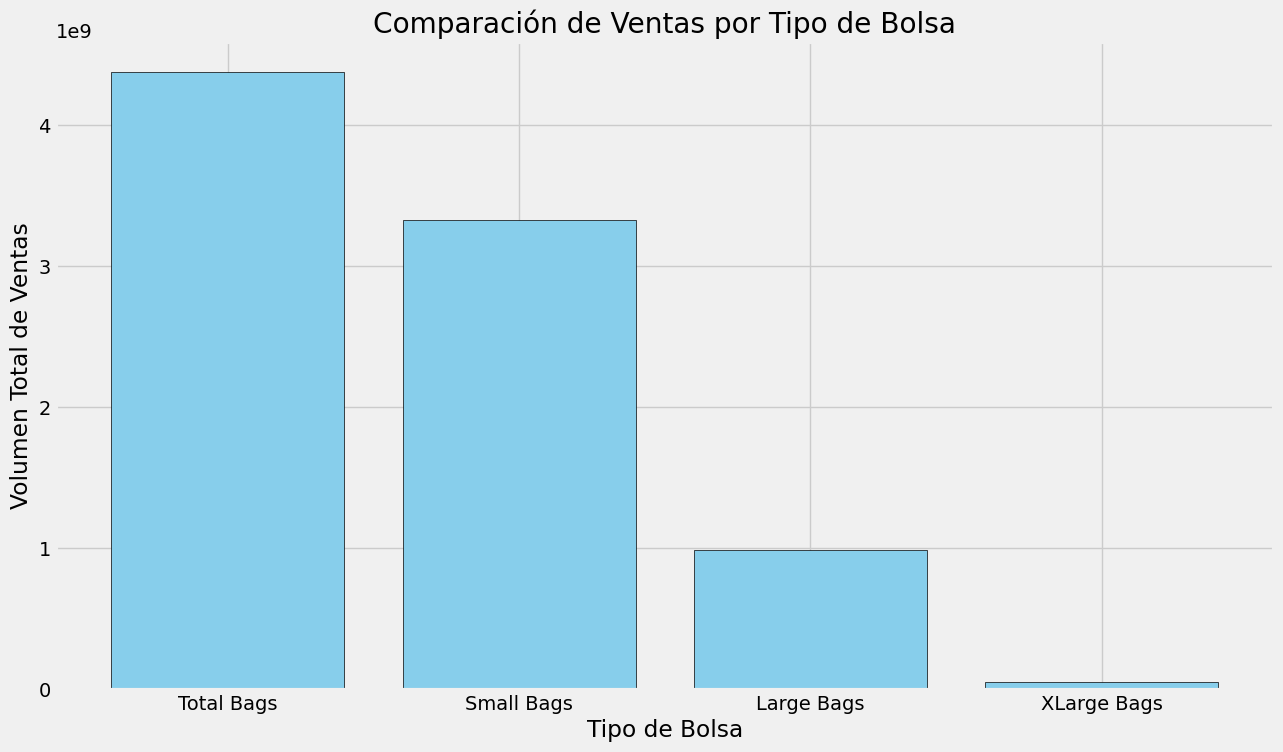

In [29]:
# Creamos el gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(bolsa_tipos, ventas_totales, color="skyblue", edgecolor="black")
plt.title("Comparación de Ventas por Tipo de Bolsa")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Volumen Total de Ventas")
plt.show()

In [30]:
#Lo podemos pasar también a logarítmos y así tendremos podemos contrastar
log_data2 = np.log1p(ventas_totales)

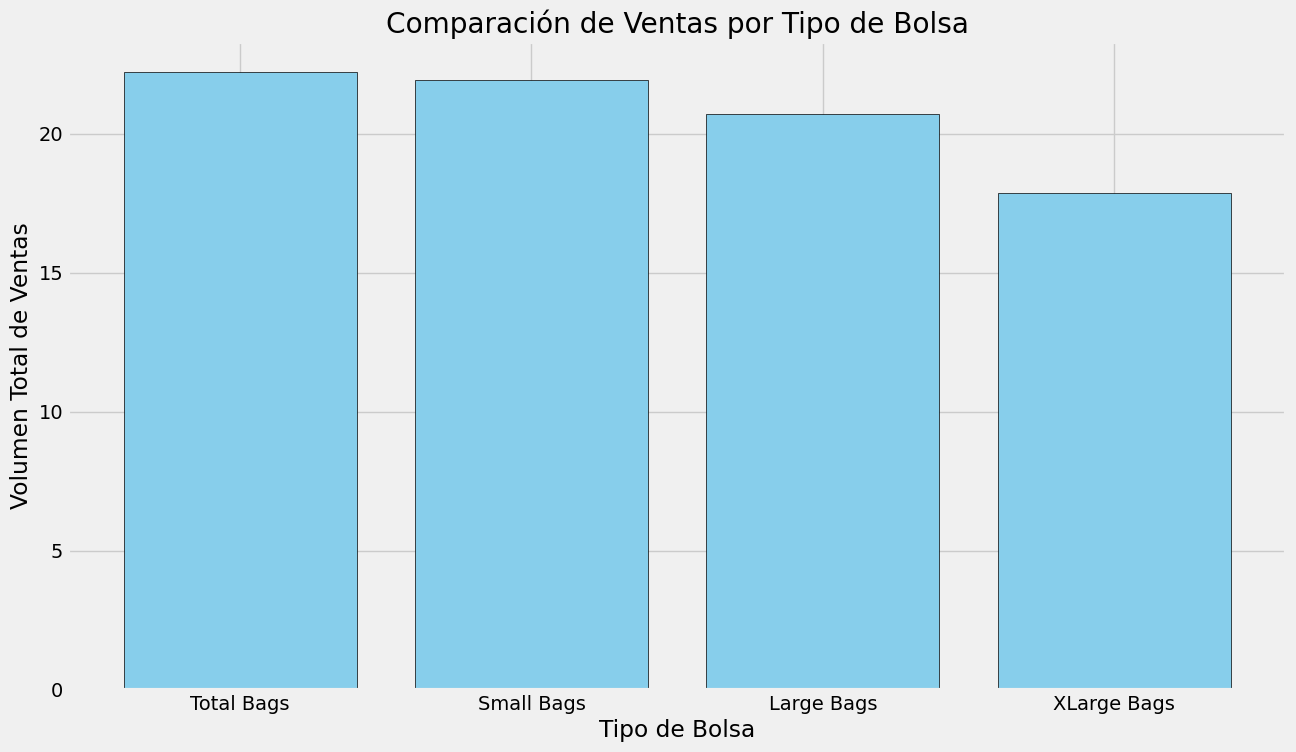

In [31]:
#Graficamos de nuevo
plt.figure(figsize=(14, 8))
plt.bar(bolsa_tipos, log_data2, color="skyblue", edgecolor="black")
plt.title("Comparación de Ventas por Tipo de Bolsa")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Volumen Total de Ventas")
plt.show()

In [32]:
#Aqui en cambio podemos ver que si aplicamos logarítmos, el gráfico no es tan representativo

In [34]:
#Comparamos con datos de totalUS
total_bags = df_totalus["Total Bags"].sum()
small_bags = df_totalus["Small Bags"].sum()
large_bags = df_totalus["Large Bags"].sum()
xlarge_bags = df_totalus["XLarge Bags"].sum()

# Luego creamos los datos para el gráfico
bolsa_tipos_totalus = ["Total Bags", "Small Bags", "Large Bags", "XLarge Bags"]
ventas_totales_totalus = [total_bags, small_bags, large_bags, xlarge_bags]

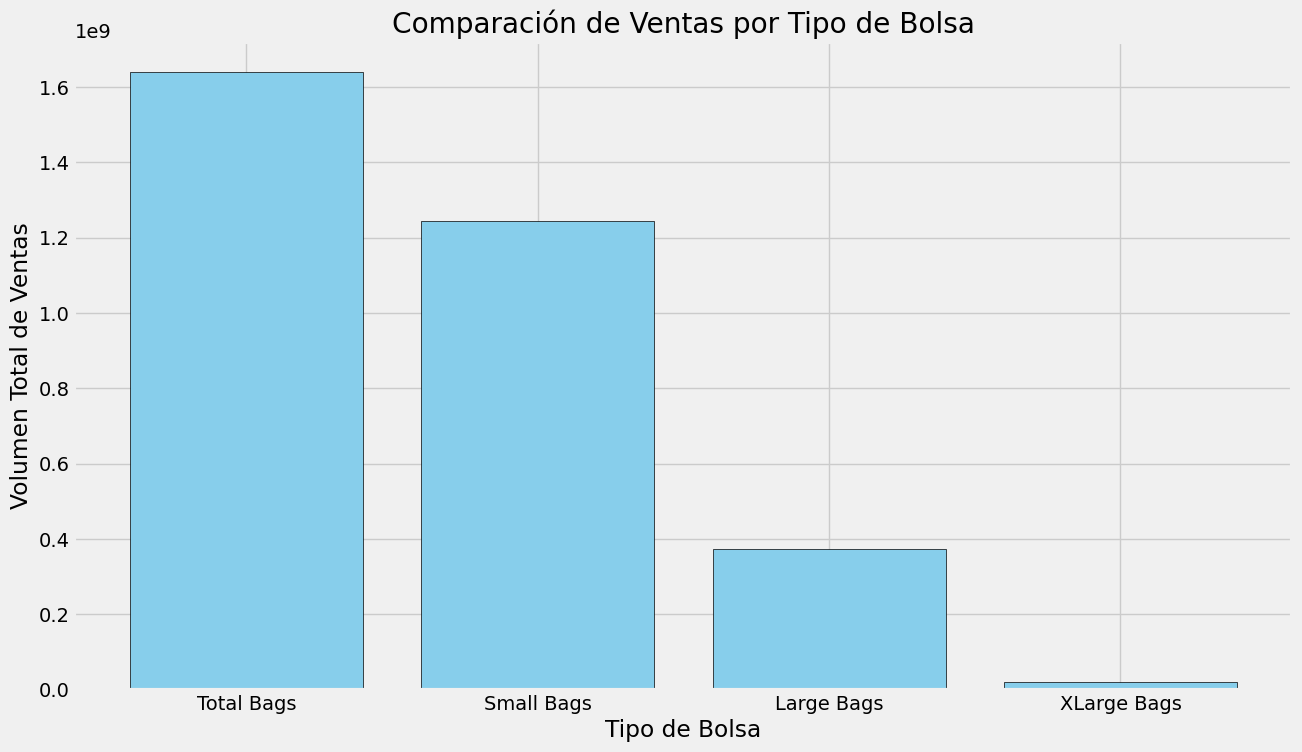

In [35]:
# Creamos el gráfico de barras con TotalUS
plt.figure(figsize=(14, 8))
plt.bar(bolsa_tipos_totalus, ventas_totales_totalus, color="skyblue", edgecolor="black")
plt.title("Comparación de Ventas por Tipo de Bolsa")
plt.xlabel("Tipo de Bolsa")
plt.ylabel("Volumen Total de Ventas")
plt.show()

#### Gráfico de dispersión del volumen vendido respecto al precio medio

In [30]:
precio_medio = df["AveragePrice"]
volumen = df["Total Volume"]

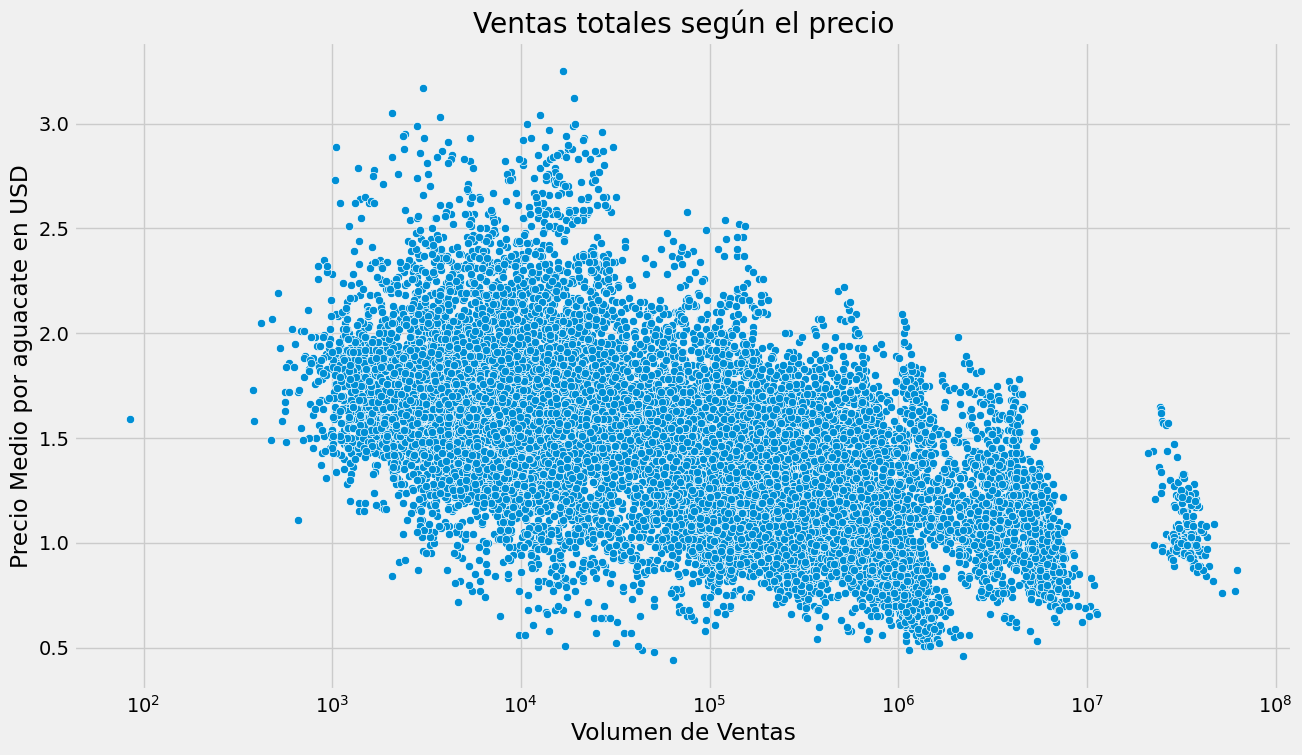

In [33]:
#Usando el precio medio por año analizaremos la tendencia del precio promedio a lo largo de los años
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x= volumen, y= precio_medio)
ax.set_xscale('log')
plt.title("Ventas totales según el precio")
plt.xlabel("Volumen de Ventas")
plt.ylabel("Precio Medio por aguacate en USD")
plt.show()

Conclusiones:
- Podemos observar que la mayoria de ventas se concentran en precios relativos entre 0,5 y 2 dólares por unidad de aguacate.